In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression

In [2]:
pip install statsmodels


In [3]:
df=pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")

In [4]:
df['FullDate']=pd.to_datetime(df['FullDate'])

In [5]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [6]:
df.isna().sum(axis=0)

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
model=Prophet()

In [8]:
df['FullDate']= pd.to_datetime(df['FullDate'])


In [9]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [10]:
df = df.rename(columns={"ElecPrice": "y",'FullDate': 'ds'})

In [11]:
df.set_index('ds', inplace=True)

In [12]:
df_daily = df.resample('D').mean()

In [13]:
df_daily.to_csv("daily.csv")

In [14]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -2.9027666971651866
p-value: 0.045027212884624614
No. of lags used: 27
No. of observations used : 3806
Critical Values:


In [15]:
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [16]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['y'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

ADF Statistic: -8.26905386687377
p-value: 4.848817773712564e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:


In [17]:
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

   1%: -3.432066157296446
   5%: -2.8622983040036005
   10%: -2.5671736550459663


In [18]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

ADF Statistic: -3.6901589888366475
p-value: 0.004253725504574097
No. of lags used: 30
No. of observations used : 3803
Critical Values:


In [19]:
df_daily.head(20)

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,15.8,1731.890833,3.6900,114.654167
2010-09-02,15.4,1620.791250,3.6900,23.783750
2010-09-03,18.3,1736.073333,4.4500,21.040625
2010-09-04,13.7,1484.920208,3.3900,20.928125
2010-09-05,14.9,1483.808750,4.4500,20.856458
2010-09-06,14.6,1781.161042,3.3100,27.799583
2010-09-07,17.1,1743.218542,3.5100,27.690417
2010-09-08,18.6,1567.032292,4.7699,20.432917
2010-09-09,19.6,1556.319167,3.4400,21.126667


In [20]:
df_daily.shape

(3834, 4)

In [21]:
df_daily1=df_daily

In [22]:
df_daily=df_daily.drop(['Tmax'], axis = 1)

In [23]:
df_daily=df_daily.drop(['SysLoad'], axis = 1)

In [24]:
df_daily=df_daily.drop(['GasPrice'], axis = 1)

In [25]:
df_daily['ds'] = df_daily.index


In [26]:
df_train=df_daily.iloc[:2758,:]

In [27]:
df_train.shape

(2758, 2)

In [28]:
df_train.head()

,y,ds
ds,,
2010-09-01,114.654167,2010-09-01
2010-09-02,23.783750,2010-09-02
2010-09-03,21.040625,2010-09-03
2010-09-04,20.928125,2010-09-04
2010-09-05,20.856458,2010-09-05


In [30]:
#model_new.plot(forecast_data)

In [31]:
df_test=df_daily.iloc[2758:,:]

In [32]:
df_test.shape

(1076, 2)

In [33]:
df_train.head()

,y,ds
ds,,
2010-09-01,114.654167,2010-09-01
2010-09-02,23.783750,2010-09-02
2010-09-03,21.040625,2010-09-03
2010-09-04,20.928125,2010-09-04
2010-09-05,20.856458,2010-09-05


In [34]:
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = model.make_future_dataframe(periods=1076, freq='D') 
forecast = model.predict(future)

In [36]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,35.308694,-55.174446,138.700028,35.308694,35.308694,6.025317,6.025317,6.025317,6.650585,6.650585,6.650585,-0.625268,-0.625268,-0.625268,0.0,0.0,0.0,41.334011
1,2010-09-02,35.306894,-54.040444,146.610460,35.306894,35.306894,9.374438,9.374438,9.374438,10.723929,10.723929,10.723929,-1.349491,-1.349491,-1.349491,0.0,0.0,0.0,44.681332
2,2010-09-03,35.305094,-64.111457,123.589040,35.305094,35.305094,0.000582,0.000582,0.000582,2.105325,2.105325,2.105325,-2.104742,-2.104742,-2.104742,0.0,0.0,0.0,35.305676
3,2010-09-04,35.303293,-78.299121,117.970872,35.303293,35.303293,-14.177317,-14.177317,-14.177317,-11.300241,-11.300241,-11.300241,-2.877076,-2.877076,-2.877076,0.0,0.0,0.0,21.125976
4,2010-09-05,35.301493,-80.116577,113.461518,35.301493,35.301493,-17.924203,-17.924203,-17.924203,-14.270479,-14.270479,-14.270479,-3.653723,-3.653723,-3.653723,0.0,0.0,0.0,17.377290


In [37]:
forecast.shape

(3834, 19)

In [38]:
forecast.to_csv('forecast1.csv')

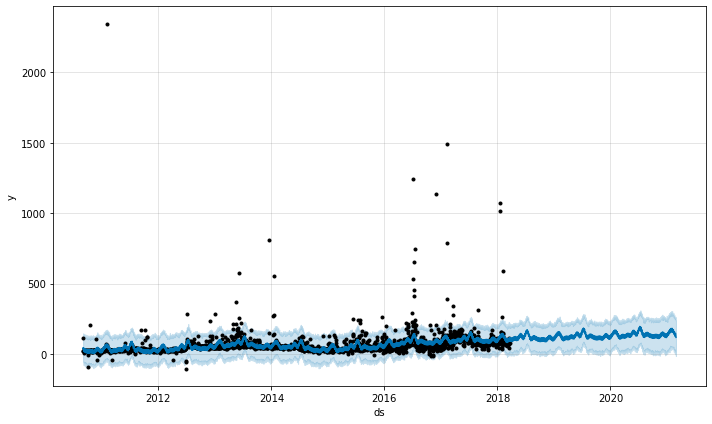

In [39]:
model.plot(forecast)
plt.show()

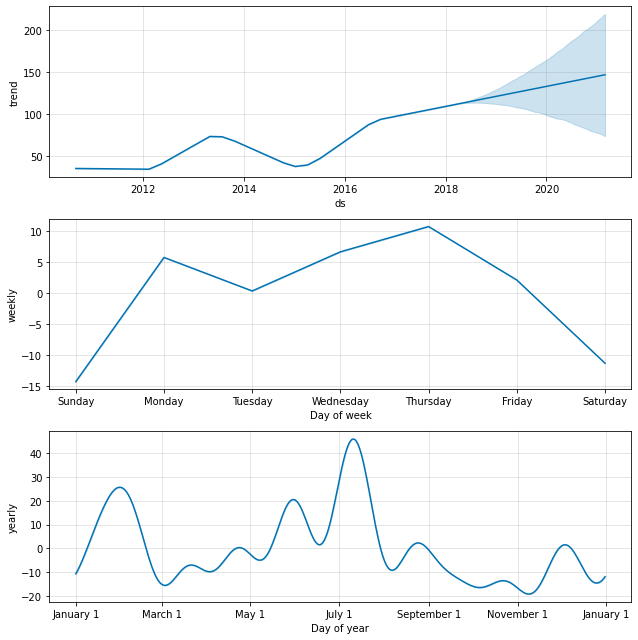

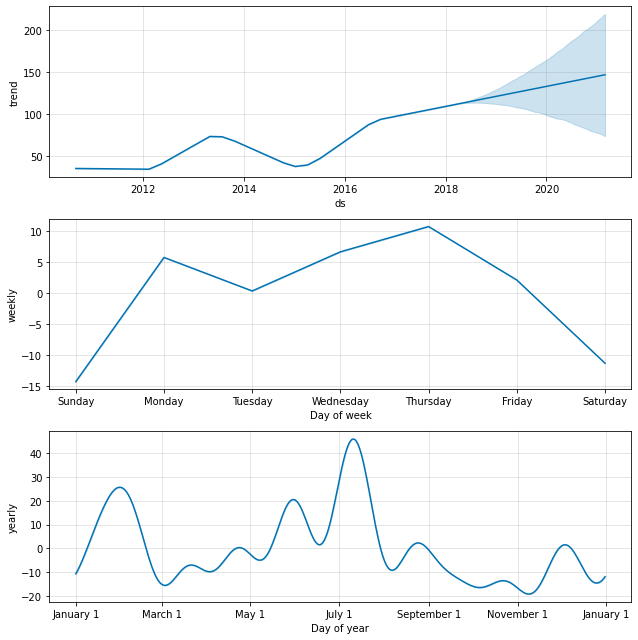

In [40]:
model.plot_components(forecast)


In [48]:
actual=forecast.iloc[2758:,18]

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(df_test['y'], actual)) 

133.48550865507653

In [52]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(df_test['y'], actual)
print("Mean absolute error : " + str(error))

Mean absolute error : 71.79900018289571


In [53]:
df_daily1.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167
2010-09-02,15.4,1620.791250,3.69,23.783750
2010-09-03,18.3,1736.073333,4.45,21.040625
2010-09-04,13.7,1484.920208,3.39,20.928125
2010-09-05,14.9,1483.808750,4.45,20.856458


In [54]:
model_new = Prophet() #instantiate Prophet
model_new.add_regressor('Tmax')
model_new.add_regressor('SysLoad')
model_new.add_regressor('GasPrice')

In [55]:
df_daily1['ds'] = df_daily1.index

df_train=df_daily1.iloc[:2758,:]
df_train.shape



(2758, 5)

In [56]:
df_train.head()

,Tmax,SysLoad,GasPrice,y,ds
ds,,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167,2010-09-01
2010-09-02,15.4,1620.791250,3.69,23.783750,2010-09-02
2010-09-03,18.3,1736.073333,4.45,21.040625,2010-09-03
2010-09-04,13.7,1484.920208,3.39,20.928125,2010-09-04
2010-09-05,14.9,1483.808750,4.45,20.856458,2010-09-05


In [57]:
df_test=df_daily1.iloc[2758:,:]
df_test.shape

(1076, 5)

In [58]:
model_new.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
future_data = model_new.make_future_dataframe(periods=1076, freq = 'D')

In [60]:
future_data.head(5)


,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05


In [61]:
future_data.shape

(3834, 1)

In [62]:
df_test.head()

,Tmax,SysLoad,GasPrice,y,ds
ds,,,,,
2018-03-21,23.8,194.085777,8.4690,72.103750,2018-03-21
2018-03-22,30.1,798.407719,8.4690,94.189583,2018-03-22
2018-03-23,33.8,753.768098,8.2769,89.115000,2018-03-23
2018-03-24,34.7,156.814110,7.5090,71.737500,2018-03-24
2018-03-25,22.1,-212.984933,7.5000,36.286458,2018-03-25


In [63]:
df_test1=df_test.drop(['y'],axis=1)

In [64]:
df_test1.head()

,Tmax,SysLoad,GasPrice,ds
ds,,,,
2018-03-21,23.8,194.085777,8.4690,2018-03-21
2018-03-22,30.1,798.407719,8.4690,2018-03-22
2018-03-23,33.8,753.768098,8.2769,2018-03-23
2018-03-24,34.7,156.814110,7.5090,2018-03-24
2018-03-25,22.1,-212.984933,7.5000,2018-03-25


In [65]:
forecast_data = model_new.predict(df_test1)


In [66]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,GasPrice,GasPrice_lower,GasPrice_upper,SysLoad,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-21,78.236945,-16.211631,173.745832,78.236945,78.236945,46.771759,46.771759,46.771759,-42.778973,...,1.772963,1.772963,1.772963,-1.273929,-1.273929,-1.273929,0.0,0.0,0.0,82.738423
1,2018-03-22,78.266650,30.172633,216.213317,78.266650,78.266650,46.771759,46.771759,46.771759,-8.949043,...,6.066403,6.066403,6.066403,-1.061189,-1.061189,-1.061189,0.0,0.0,0.0,121.103676
2,2018-03-23,78.296354,11.434591,201.878595,78.296354,78.296354,43.960611,43.960611,43.960611,-11.447968,...,-1.846956,-1.846956,-1.846956,-1.019427,-1.019427,-1.019427,0.0,0.0,0.0,107.951381
3,2018-03-24,78.326059,-36.975445,152.289443,78.326059,78.326059,32.723335,32.723335,32.723335,-44.865440,...,-4.890952,-4.890952,-4.890952,-1.138236,-1.138236,-1.138236,0.0,0.0,0.0,60.163452
4,2018-03-25,78.355763,-51.310823,129.435413,78.355763,78.355763,32.591631,32.591631,32.591631,-65.566783,...,-2.885837,-2.885837,-2.885837,-1.403014,-1.403014,-1.403014,0.0,0.0,0.0,41.101570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,2021-02-24,110.050430,-54.605825,138.134404,76.820561,142.944562,4.787460,4.787460,4.787460,-57.202112,...,1.772963,1.772963,1.772963,-18.080217,-18.080217,-18.080217,0.0,0.0,0.0,41.338306
1072,2021-02-25,110.080134,-40.923006,154.645714,76.815419,143.027672,2.412398,2.412398,2.412398,-43.056494,...,6.066403,6.066403,6.066403,-19.182377,-19.182377,-19.182377,0.0,0.0,0.0,56.329919
1073,2021-02-26,110.109839,-45.280002,161.612699,76.810278,143.110781,2.214842,2.214842,2.214842,-31.445440,...,-1.846956,-1.846956,-1.846956,-20.044359,-20.044359,-20.044359,0.0,0.0,0.0,58.997674
1074,2021-02-27,110.139543,-55.902225,138.383273,76.805136,143.193890,2.153380,2.153380,2.153380,-42.137952,...,-4.890952,-4.890952,-4.890952,-20.656261,-20.656261,-20.656261,0.0,0.0,0.0,44.617443


In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(df_test['y'], forecast_data['yhat'])) 

113.10314255815665

In [68]:
forecast_data.to_csv("forecast2.csv")

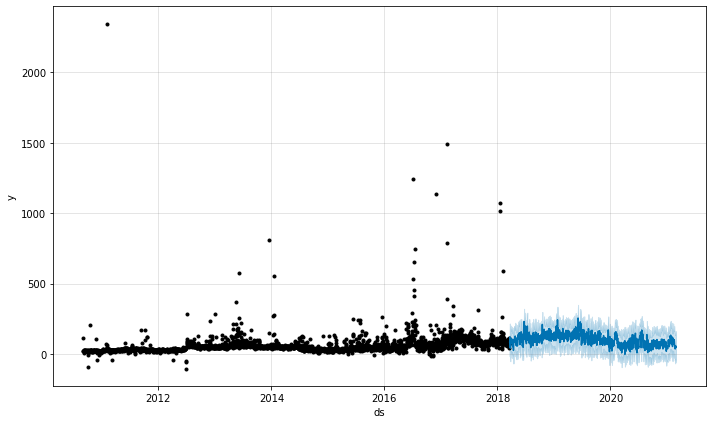

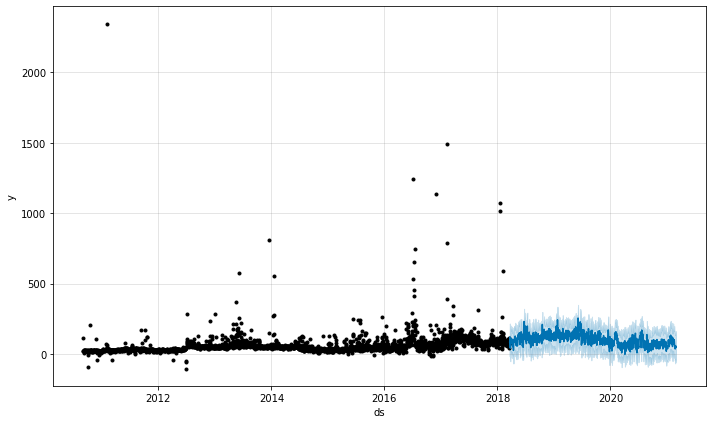

In [69]:
model_new.plot(forecast_data)


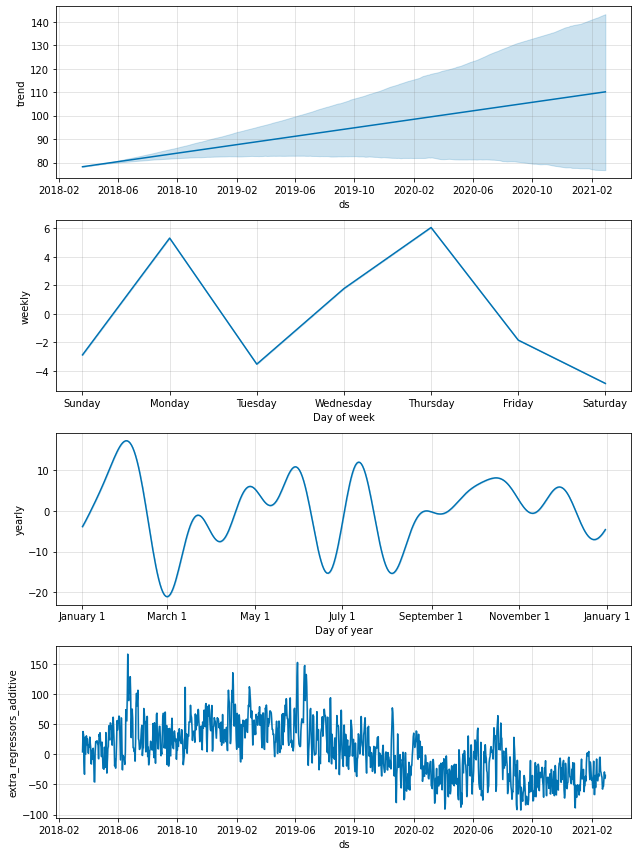

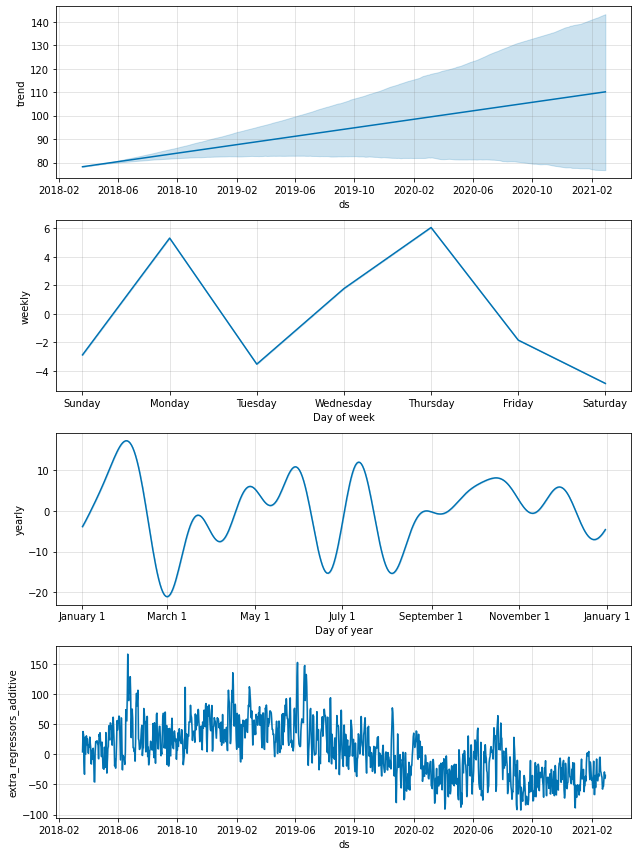

In [70]:
model_new.plot_components(forecast_data)
